In [68]:
%matplotlib inline
import numpy as np
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import sklearn
from icecream import ic

# 2. 教師あり学習

## 2.1 クラス分類と回帰
* クラス分類問題は、２クラス分類と多クラス分類に分けられる
* ２クラス分類問題では、しばしば一方のクラスを陽性（positive）クラス、もう一方を陰性（negative）クラスと呼ぶ
* 回帰タスクの目的は連続値の予測

## 2.2 汎化、過剰適合、適合不足
* 汎化：モデルが新しい未知のデータに対して正確に予測ができるようにすること
* 過剰適合：訓練データの個々の特徴にモデルが適合しすぎた状態（新しいデータに関しては汎化できないモデルになってしまう）
* 適合不足：単純すぎるモデルを選択したことで、データの側面や変異を捉えられず、訓練データに対してすら適合しない状態

### 2.2.1 モデルの複雑さとデータセットの大きさ
* データセットに含まれるデータポイントがバリエーションに富んでいれば、過剰適合を起こしにくく、より複雑なモデルを利用できる
* モデルをいじるよりもデータ量を増やすほうがよい場合も多い

## 2.3 教師あり機械学習アルゴリズム

### 2.3.1 サンプルデータセット

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


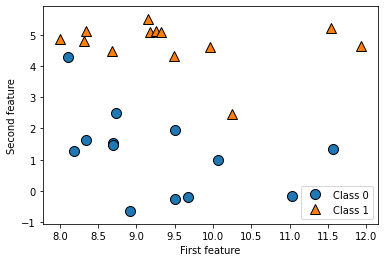

In [36]:
# forgeデータセットの生成
X,y=mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'],loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))
plt.show()

Text(0, 0.5, 'Target')

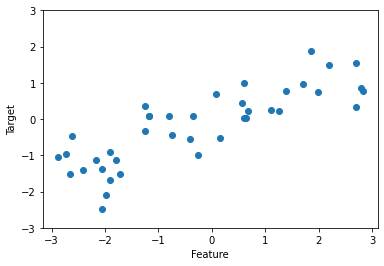

In [37]:
# waveデータセットの生成
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [7]:
# ウィスコンシン乳癌データセット
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))
display(cancer.target)

cancer.keys():
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
cancer.data.shape

(569, 30)

In [6]:
print('Sample counts per class:\n{}'.format(
    {n:v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [24]:
# boston_housingデータセット
from sklearn.datasets import load_boston
boston=load_boston()
ic(boston.data.shape)
boston_dataframe=pd.DataFrame(boston.data,columns=boston.feature_names)
display(boston_dataframe)


ic| boston.data.shape: (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [25]:
# boston_housingデータセットに交互作用による特徴量を加えたデータセット
X,y=mglearn.datasets.load_extended_boston()
ic(X.shape)
boston_extend_dataframe=pd.DataFrame(X)
display(boston_extend_dataframe)

ic| X.shape: (506, 104)


,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.026936,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.026936,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180


### 2.3.2 k-最近傍法
* k-NNアルゴリズムの一番単純な場合は、一つの近傍点、つまり訓練データに含まれる点の中で予測したいデータポイントに最も近いものだけを見る
* 予測にはこの点に対する出力をそのまま用いる
* 一つ以上の近傍点を考慮に入れる場合には、投票でラベルを決める

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


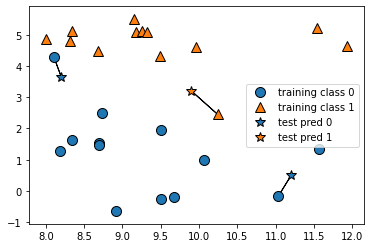

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


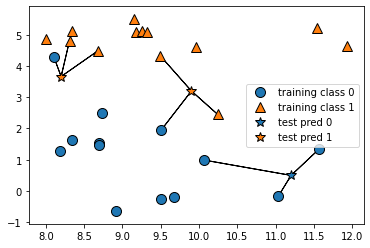

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
from sklearn.model_selection import train_test_split

X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [10]:
clf.score(X_test,y_test)

0.8571428571428571

#### 2.3.2.2 KNeighborsClassifierの解析

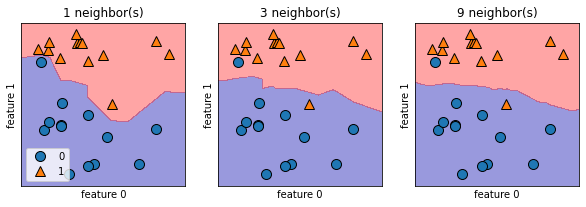

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# kが1,3,9の場合の決定境界を描画する
fig,axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    # fitメソッドは自分自身を返すので、一行で
    # インスタンスを生成してfitすることができる
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

fig.set_facecolor('w')
axes[0].legend(loc=3)

ic| cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


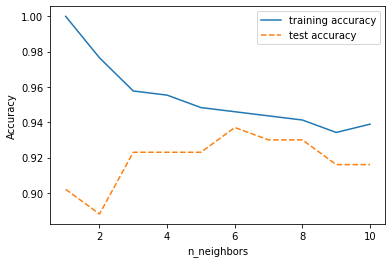

In [39]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
ic(cancer.keys())
cancer_dataFrame=pd.DataFrame(cancer.data,columns=cancer.feature_names)
display(cancer_dataFrame)

# 引数stratifyに均等に分割させたいデータ（多くの場合は正解ラベル）を指定すると、そのデータの値の比率が一致するように分割されます。
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=66)

training_accuracy=[]
test_accuracy=[]

# n_neighborsを1から10まで試す
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train,y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(neighbors_settings,training_accuracy,label='training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test accuracy',linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

#### 2.3.2.3 k-近傍回帰
k最近傍法において回帰を行う変種
n_neighbors=1の場合は最近傍点の値をそのまま使う  
n_neighborsが複数の場合は近傍点の値の平均値を使う

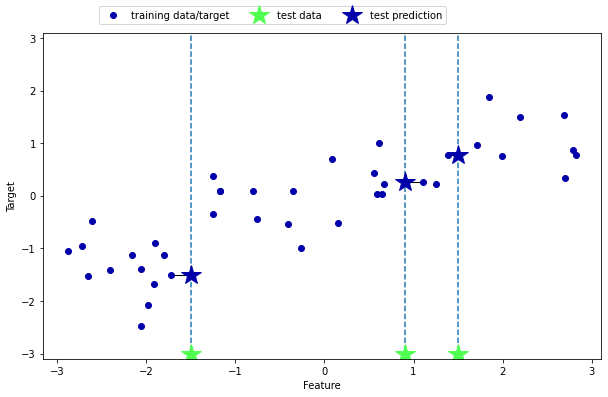

In [40]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

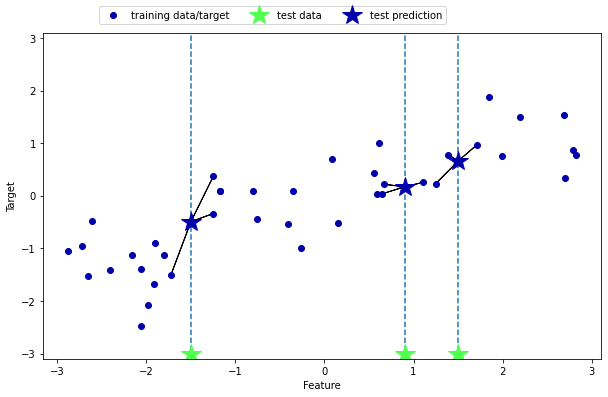

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test=train_test_split(
    X,y,random_state=0
)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
ic(X_test)
reg.predict(X_test)

ic| X_test: array([[-1.24713211],
                   [ 0.67111737],
                   [ 1.71105577],
                   [-2.06388816],
                   [-2.87649303],
                   [-1.89957294],
                   [ 0.55448741],
                   [ 2.81945911],
                   [-0.40832989],
                   [-2.72129752]])


array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [24]:
reg.score(X_test,y_test)    # R^2（決定係数）を返す

0.8344172446249605

### 2.3.2.4 KNeighborsRegressorの解析

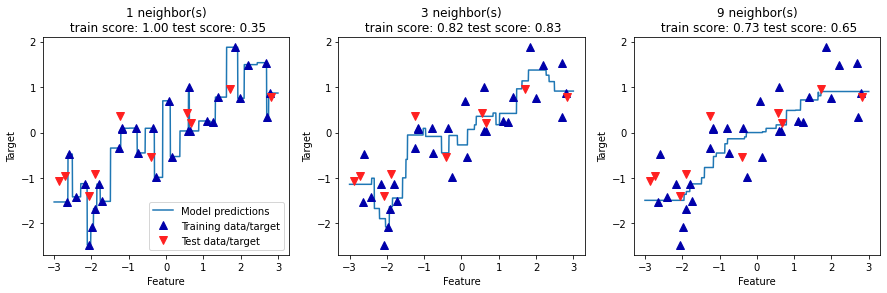

In [25]:
fig,axes=plt.subplots(1,3,figsize=(15,4))
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)

    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors,reg.score(X_train,y_train),
            reg.score(X_test,y_test)
        )
    )
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model predictions','Training data/target','Test data/target'],loc='best')

#### 2.3.2.5 利点と欠点とパラメータ
KNeighbors分類器の重要なパラメータ
* 近傍点の数（実用上は３や５程度の小さい数で十分だが、パラメータ調整が必要）
* データポイント間の距離測度（デフォルトはユークリッド距離だが、殆どの場合これでうまくいく）

k-最近傍法の利点
* モデルが理解しやすい（モデル構築が簡単）
* 多くの場合あまり調整しなくても十分に高い性能を示す

k-最近傍法の欠点
* 訓練セットが大きくなると（特徴量数とサンプル数のどちらが大きくなっても）予測が遅くなる
* データの前処理が必須である
* 多数の特徴量（数百以上）を持つデータセットではうまく機能しない
* 疎なデータセットでは特に相性が悪い
* 処理速度が遅く、多数の特徴量を扱えないため、実際にはほとんど使われていない


### 2.3.3 線形モデル
線形モデル：入力特徴量の線形関数を用いて予測を行うもの

#### 2.3.3.1 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


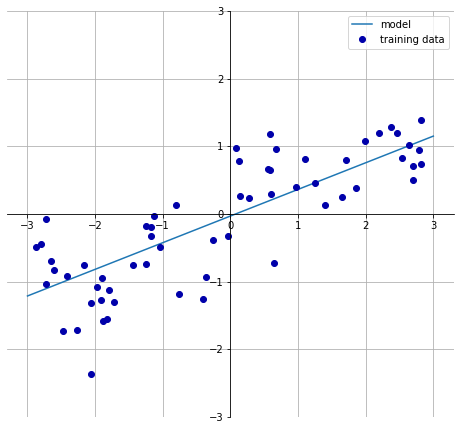

In [26]:
mglearn.plots.plot_linear_regression_wave()

* 多数の特徴量を持つデータに対しては、線形モデルは非常に強力
* 訓練データのデータポイント数よりも特徴量の数のほうが多い場合には、どのようなyでも完全に訓練データセットの線形関数としてモデル化できる

#### 2.3.3.2 線形回帰（通常最小二乗法）
* 通常最小二乗法（OLS: ordinary least squares）：訓練データにおいて、予測と真の回帰ターゲットyとの平均二乗誤差（mean squared error）が最小になるように、パラメータw（重み、もしくは係数（coefficient））とb（オフセット、もしくは切片（intercept,b））を求める


In [56]:
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)
ic(lr.coef_)    # 重み w
ic(lr.intercept_)   # 切片 b

ic| lr.coef_: array([0.39390555])
ic| lr.intercept_: -0.031804343026759746


-0.031804343026759746

In [57]:
# R^2(決定係数)を表示
ic(lr.score(X_train,y_train))
ic(lr.score(X_test,y_test))

ic| lr.score(X_train,y_train): 0.6700890315075756
ic| lr.score(X_test,y_test): 0.65933685968637


0.65933685968637

* １次元データセットでは、モデルがとても単純なので（もしくは制約されているので）、過剰適合の危険は少ない

In [58]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

ic(lr.score(X_train,y_train))
ic(lr.score(X_test,y_test))

ic| lr.score(X_train,y_train): 0.9520519609032727
ic| lr.score(X_test,y_test): 0.6074721959665571


0.6074721959665571

* 高次元のデータセットに対しては（つまりデータセットが多くの特徴量を持つ場合は）、線形モデルはより強力になるので、過剰適合の可能性が高くなる

#### 2.3.3.3 リッジ回帰
* 過剰適合を防ぐために、係数の絶対値の大きさが可能な限り小さくなるように制約する（正則化）
* リッジ回帰で用いられる正則化はL2正則化と呼ばれる

In [59]:
from sklearn.linear_model import Ridge

ridge=Ridge().fit(X_train,y_train)
ic(ridge.score(X_train,y_train))
ic(ridge.score(X_test,y_test))

ic| ridge.score(X_train,y_train): 0.8857966585170941
ic| ridge.score(X_test,y_test): 0.7527683481744751


0.7527683481744751

* Ridgeは制約の強いモデルのため、過剰適合の危険は少ない
* 複雑度の低いモデルは、訓練セットに対する性能は低いが汎化性能は高い
* Ridgeモデルでは、モデルの簡潔さ（０に近い係数の数）と、訓練セットに対する性能がトレードオフになる
* このどちらに重きを置くかは、ユーザーがalphaパラメータを用いて指定することができる

In [60]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
ic(ridge10.score(X_train,y_train))
ic(ridge.score(X_test,y_test))

ic| ridge10.score(X_train,y_train): 0.7882787115369614
ic| ridge.score(X_test,y_test): 0.7527683481744751


0.7527683481744751

* alphaを小さくすると、係数の制約は小さくなる

In [61]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
ic(ridge01.score(X_train,y_train))
ic(ridge01.score(X_test,y_test))

ic| ridge01.score(X_train,y_train): 0.928227368500199
ic| ridge01.score(X_test,y_test): 0.7722067936479818


0.7722067936479818

* alphaパラメータのモデルへの影響を定量的に知るには、さまざまなalphaに対するモデルにcoef_属性を確認するとよい
* alphaが大きい場合は小さい場合よりもcoef_の要素の絶対値が小さくなることが期待される

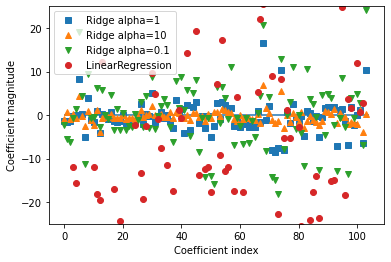

In [62]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

* 正則化の影響を理解するもう一つの方法として、alphaの値を固定して、利用できる訓練データの量を変化させる方法がある
* モデルの性能をデータセットサイズの関数として示したものを、学習曲線（learning curve）という

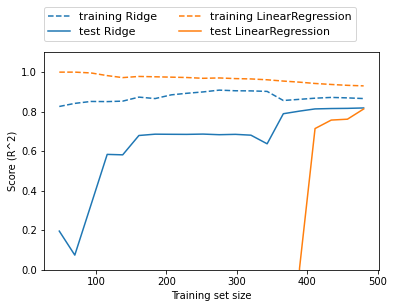

In [34]:
mglearn.plots.plot_ridge_n_samples()

* 十分なデータがあるならばリッジ回帰と線形回帰は同じ性能を示す

#### 2.3.3.4 Lasso
* リッジ回帰と同様に、Lassoも係数が０になるように制約をかけるが、かけ方が少し違い、L1正則化と呼ばれる
* L1正則化の結果、Lassoにおいては、いくつかの係数が完全に０になる（いくつかの特徴量が完全に無視される）

In [35]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train,y_train)
ic(lasso.score(X_train,y_train))
ic(lasso.score(X_test,y_test))
ic(np.sum(lasso.coef_!=0))  # 選択された特徴量の数

ic| lasso.score(X_train,y_train): 0.29323768991114607
ic| lasso.score(X_test,y_test): 0.20937503255272294
ic| np.sum(lasso.coef_!=0): 4


4

* デフォルトのalpha=1.0ではLassoの性能は訓練セットに対しても、テストセットに対しても非常に悪い結果となった（適合不足）
* 適合不足の度合いをへらすには、alphaを減らせばよい。その際にmax_iter（最大の繰り返し回数）をデフォルトから増やす必要がある

In [36]:
# max_iterの値を増やしている
# こうしておかないとモデルが、'max_iter'を増やすように警告を発する
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
ic(lasso001.score(X_train,y_train))
ic(lasso001.score(X_test,y_test))
ic(np.sum(lasso001.coef_!=0))

ic| lasso001.score(X_train,y_train): 0.8962226511086497
ic| lasso001.score(X_test,y_test): 0.7656571174549982
ic| np.sum(lasso001.coef_!=0): 33


33

* 性能はRidgeよりも少し良いぐらいだが、104の特徴量のうち、わずか33しか使っていない
* これによってモデルは潜在的には理解しやすくなっている

In [37]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
ic(lasso00001.score(X_train,y_train))
ic(lasso00001.score(X_test,y_test))
ic(np.sum(lasso00001.coef_!=0))

ic| lasso00001.score(X_train,y_train): 0.9507158754515463
ic| lasso00001.score(X_test,y_test): 0.6437467421272821
ic| np.sum(lasso00001.coef_!=0): 96


96

Text(0, 0.5, 'Coefficient magnitude')

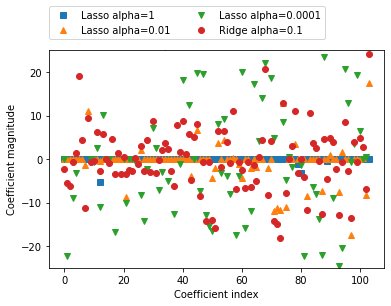

In [38]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso001.coef_,'^',label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

* 実際に使う場合には、まずリッジ回帰を試してみるとよい
* 特徴量がたくさんあって、その内に重要なものがわずかしかないと予想される場合はLassoの方が向いている
* 解釈しやすいモデルがほしいのであれば、重要な特徴量のサブセットを選んでくれるLassoのほうが理解しやすいモデルが得られる
* scikit-learnにはLassoとRidgeのペナルティを組み合わせたElasticNetクラスがある
* 実用上はこの組み合わせが最良の結果をもたらすが、L1正則化とL2正則化の両方のパラメータ調整が必要

#### 2.3.3.5 クラス分類のための線形モデル
* linear_model.LogisticRegressionに実装されているロジスティック回帰（logistic regression）と、svm.LinearSVCに実装されている線形サポートベクタマシン（linear support vector machines: SVM）は、最も一般的な線形クラス分類アルゴリズム
* ロジスティック回帰は名前に反して、回帰アルゴリズムではなくクラス分類アルゴリズムのため注意

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


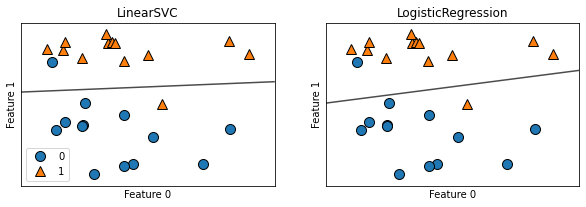

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()
fig, axes=plt.subplots(1,2,figsize=(10,3),facecolor='w')

for model,ax in zip([LinearSVC(max_iter=10000),LogisticRegression(max_iter=10000,solver='liblinear')],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(
        clf,X,fill=False,eps=0.5,
        ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

* LogisticRegressionとLinearSVCにおける正則化の強度を決定するトレードオフパラメータはCと呼ばれ、Cが大きくなると正則化は弱くなる
* Cを大きくするとLogisticRegressionとLinearSVCは訓練データに対しての適合度をあげようとするが、Cを小さくすると係数ベクトル（ｗ）を0に近づけることを重視するようになる
* 小さいCを用いると、データポイントの「大多数」に対して適合しようとするが、大きいCを用いると、個々のデータポイントを正確にクラス分類することを重視するようになる

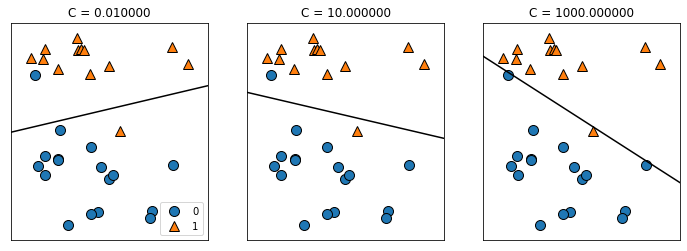

In [52]:
mglearn.plots.plot_linear_svc_regularization()

* 高次元空間における線形モデルによるクラス分類は非常に強力になるため、特徴量の数が多い場合には過剰適合を回避する方法が重要になってくる

In [55]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression(solver='liblinear').fit(X_train,y_train)
ic(logreg.score(X_train,y_train))
ic(logreg.score(X_test,y_test))

ic| logreg.score(X_train,y_train): 0.9553990610328639
ic| logreg.score(X_test,y_test): 0.958041958041958


0.958041958041958

* 訓練セットとテストセットの精度がとても近いということは、適合不足の可能性が高い

In [53]:
logreg100=LogisticRegression(C=100,solver='liblinear').fit(X_train,y_train)
ic(logreg100.score(X_train,y_train))
ic(logreg100.score(X_test,y_test))

ic| logreg100.score(X_train,y_train): 0.9671361502347418
ic| logreg100.score(X_test,y_test): 0.965034965034965


0.965034965034965

In [54]:
logreg001=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
ic(logreg001.score(X_train,y_train))
ic(logreg001.score(X_test,y_test))

ic| logreg001.score(X_train,y_train): 0.9342723004694836
ic| logreg001.score(X_test,y_test): 0.9300699300699301


0.9300699300699301

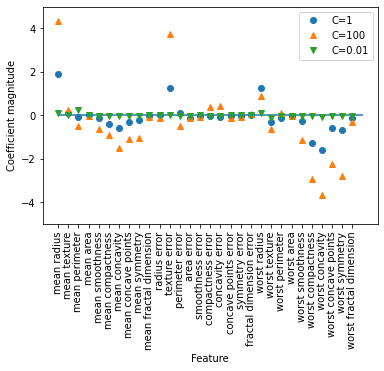

In [56]:
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()

* LogisticRegressionではデフォルトでL2正則化が行われる
* mean perimeterのように、モデルによって係数の正負が変わるものは良性か悪性かの判断に注意が必要

Trainning accuracy of l1 logreg with C=0.010: 0.92
Test accuracy of l1 logreg with C=0.010: 0.93
Trainning accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Trainning accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


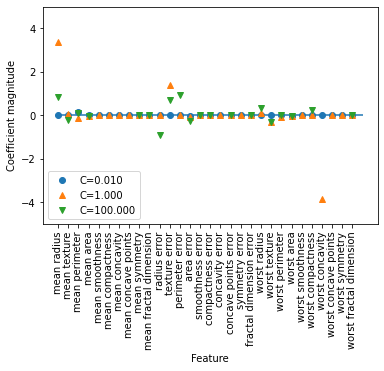

In [57]:
for C,marker in zip([0.01,1,100],['o','^','v']):
    lr_l1=LogisticRegression(C=C,penalty='l1',solver='liblinear').fit(X_train,y_train)
    print('Trainning accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C,lr_l1.score(X_train,y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5,5)
plt.legend(loc=3)

* L1正則化を使うとわずかな特徴量しか使わないように制限される（係数が0になる）

#### 2.3.3.6 線形モデルによる多クラス分類
* 2クラス分類アルゴリズムを多クラス分類アルゴリズムに拡張する一般的な手法として１対その他（one-vs.-rest）アプローチがある
* 1対その他アプローチでは、各クラスに対してそのクラスと他のすべてのクラスを分類する２クラス分類モデルを学習する
* クラスがたくさんある場合にはたくさんの２クラス分類モデルをつかうことになる

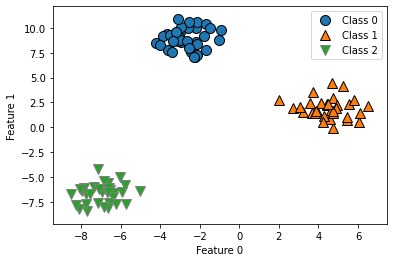

In [76]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2'])

In [77]:
linear_svm=LinearSVC(max_iter=10000).fit(X,y)
ic(linear_svm.coef_.shape)  # 係数配列の形状
ic(linear_svm.intercept_.shape) # 切片配列の形状

ic| linear_svm.coef_.shape: (3, 2)
ic| linear_svm.intercept_.shape: (3,)


(3,)

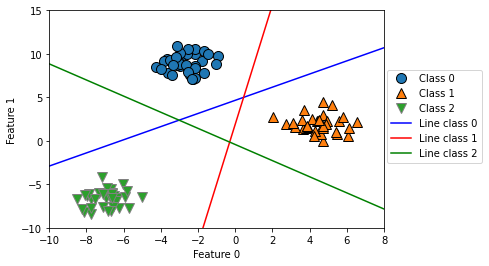

In [81]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept ,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

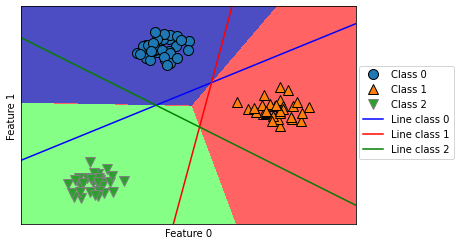

In [87]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line class 0','Line class 1','Line class 2'],loc=(1.01,0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 2.3.3.7 利点、欠点、パラメータ
* 線形モデルの主要なパラメータは、回帰モデルではalpha、LinearSVCとLogisticRegressionではCと呼ばれる正則化パラメータ
* alphaが大きい場合、Cが小さい場合は単純なモデルに対応する（特に回帰モデルの場合、このパラメータの調整は非常に重要）
* 通常、Cやalphaを調整する際には、対数スケールで値を変更する
* 一部の特徴量だけを重要視する場合や、モデルの解釈のしやすさを重要視するならL1正則化を使う
* 上記以外はデフォルトのL2正則化を使ったほうが良い
* 線形モデルの訓練は非常に高速で、予測も高速
* 非常に大きいデータセットにも適用できるし、疎なデータに対してもうまく機能する
* サンプル点が１０万点、１００万点もあるようなデータに対しては、LogisticRegressionとRidgeにsolver='sag'オプションを使うことを検討したほうが良い
* さらに大きなデータに対しては、SGDClassifierクラスとSGDRegressorクラスを使う方法がある
* 線形モデルでは、特徴量の数がサンプルの個数よりも多いときに性能を発揮する
* 低次元空間では、他のモデルのほうが良い汎化性能を示すこともある

### 2.3.4 ナイーブベイズクラス分類機
* 線形モデルによく似たクラス分類機の一族
* 訓練が線形モデルよりもさらに高速
* 汎化性能はLogisticRegressionやLinearSVCよりもわずかに劣る場合が多い
* クラスに対する統計値を個々の特徴量ごとに集めてパラメータを学習するため高速
* sklearnの3種のナイーブベイズ分類器  
    GaussianNB:     任意の連続データに適用  
    BernoulliNB:    2値データに適用  
    MultinomialNB:  カウントデータ（整数カウント）に適用
    

#### BernoulliNB
* 非ゼロ特徴量の数をカウントする

In [2]:
# 以下は例
import numpy as np

X=np.array([
    [0,1,0,1],
    [1,1,0,0],
    [1,1,1,0],
    [0,0,0,1],
    [1,0,1,0]])
y=np.array([1,1,0,0,0])

# 各クラスごとに非ゼロ特徴量の数をカウントする
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
print('Feature counts:\n{}'.format(counts))

Feature counts:
{0: array([2, 1, 2, 1]), 1: array([1, 2, 0, 1])}


In [7]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np
from icecream import ic

X=np.array([
    [0,1,0,1],
    [1,1,0,0],
    [1,1,1,0],
    [0,0,0,1],
    [1,0,1,0]])
y=np.array([1,1,0,0,0])

bNB=BernoulliNB().fit(X,y)
ic(bNB.predict(X))

ic| bNB.predict(X): array([1, 1, 0, 0, 0])


array([1, 1, 0, 0, 0])

* MultinomialNBはクラスごとの、個々の特徴量の平均値を考慮に入れる
* GaussianNBは平均値だけでなく、標準偏差も考慮する
* 予測の際には、個々のクラスの統計量とデータポイントが比較され、最もよく適合したクラスが採用される
* MultinomialNBやBernoulliNBでは線形モデルの場合と同じ形の予測式になる
* ナイーブベイズモデルのcoef_は線形モデルの場合と意味が異なる（ナイーブベイズのcoef_はwと同じではない）

#### 2.3.4.1 利点、欠点、パラメータ
* MultinomialNBとBernoulliNBにはパラメータalphaがある
* アルゴリズムはすべての特徴量に対して正の値を持つ仮想的なデータポイントがalphaの大きさに応じた量だけ追加されたかのように振る舞う
* alphaが大きくなるとスムーズになり、モデルの複雑さは減少する
* アルゴリズムの性能はalphaの値に対して比較的頑健であるため、アルゴリズムの性能に致命的な違いをもたらすことはないが、多くの場合この値を調整することで、いくらか精度を上げることができる
* GaussianNBは多くの場合、高次元データに対して用いられる
* MultinomialNBとBernoulliNBはテキストのような疎なカウントデータに対して用いられる
* 一般にMultinomialNBのほうがBernoulliNBよりも若干性能が良いが、特に比較的多数のゼロ特徴量がある場合（大きなドキュメントなど）にはMultinomialNBが有効
* ナイーブベイズモデルの利点と欠点の多くは線形モデルと共通し、訓練も予想も非常に高速で、訓練の過程も理解しやすく、高次元の疎なデータに対してもうまく機能し、パラメータの設定に対しても比較的頑健である
* ナイーブベイズモデルは、線形モデルですら時間がかかりすぎるような大規模なデータセットに対するベースラインモデルとして非常に有用

### 2.3.5 決定木
* クラス分類と回帰タスクに広く用いられているモデル
* Yes/Noで答えられる質問で構成された階層的な木構造を学習する

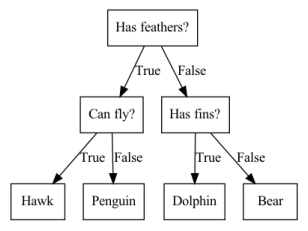

In [34]:
import mglearn

mglearn.plots.plot_animal_tree()

#### 2.3.5.1 決定木の構築
* 決定木による学習は、正解に最も早くたどり着けるような一連のYes/No型の質問の学習を意味する
* 機械学習ではこれらの質問はテスト（test）と呼ばれる（モデルの汎化性能を図るためのテストセットとは別のもの）
* 連続値に対するテストは「特徴量iは値aよりも大きいか？」という形をとる
* 個々のテストは一つの特徴量しか考えないので、分割された領域は常に軸に平行な境界を持つ
* データの再帰分割は、対象の領域（決定木の葉）に一つの対象値（1クラス、もしくは一つの回帰値）しか含まれなくなるまで繰り返される
* ひとつの対象値のデータポイントしか含まないような決定木の葉を純粋（pure）と呼ぶ
* 新しいデータポイントに対する予測は、そのデータポイントが属する特徴量空間上の分割領域によって行われ、その領域に含まれるデータポイントの多数が持つターゲット値が用いられる

#### 2.3.5.2 決定木の複雑さの制御
* 決定木は葉が純粋になるまで分割を続けると、過剰適合になる
* 過剰適合を防ぐには以下の二つの戦略がある  
    事前枝刈り（pre-pruning）：     構築過程で木の生成を早めに止める  
    事後枝刈り（post-pruning）:     一度木を構築してから情報の少ないノードを削除する（ただの枝刈り（pruning）とも呼ばれる）  
* sklearnでは決定木はDecisionTreeRegressorクラスとDecisionTreeClassifierクラスに実装されている
                                    


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from icecream import ic

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
ic(tree.score(X_train,y_train))
ic(tree.score(X_test,y_test))

ic| tree.score(X_train,y_train): 1.0
ic| tree.score(X_test,y_test): 0.9370629370629371


0.9370629370629371

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from icecream import ic

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
# 木の深さを制限する
tree=DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train,y_train)
ic(tree.score(X_train,y_train))
ic(tree.score(X_test,y_test))

ic| tree.score(X_train,y_train): 0.9882629107981221
ic| tree.score(X_test,y_test): 0.951048951048951


0.951048951048951

#### 2.3.5.3 決定木の解析
* treeモジュールのexport_graphviz関数を使って木を可視化できる
* 決定木を検証する良い方法のひとつは、大多数のデータがたどるパスを見つけること

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

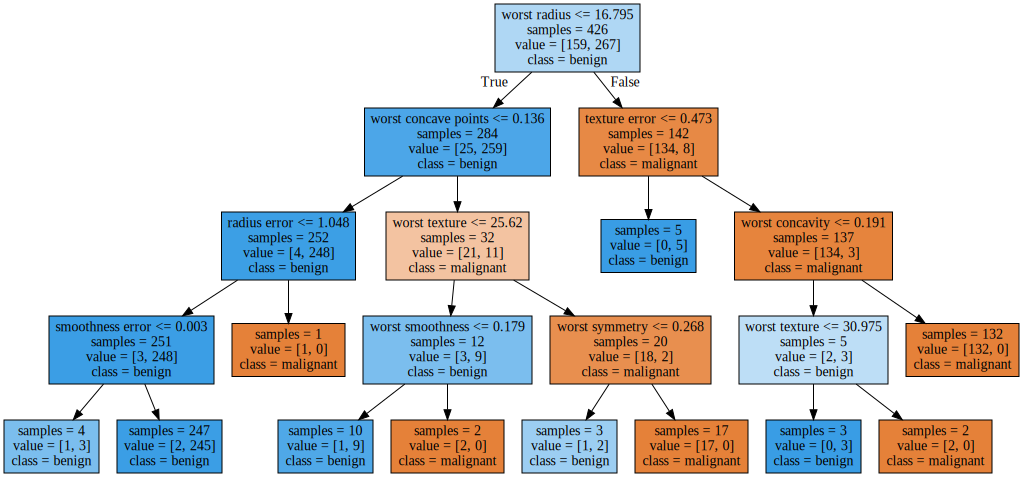

In [1]:
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

#### 2.3.5.4 決定木の特徴量の重要性
* 特徴量の重要度（feature_importance）

In [40]:
display(cancer.feature_names)
display(tree.feature_importances_)

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

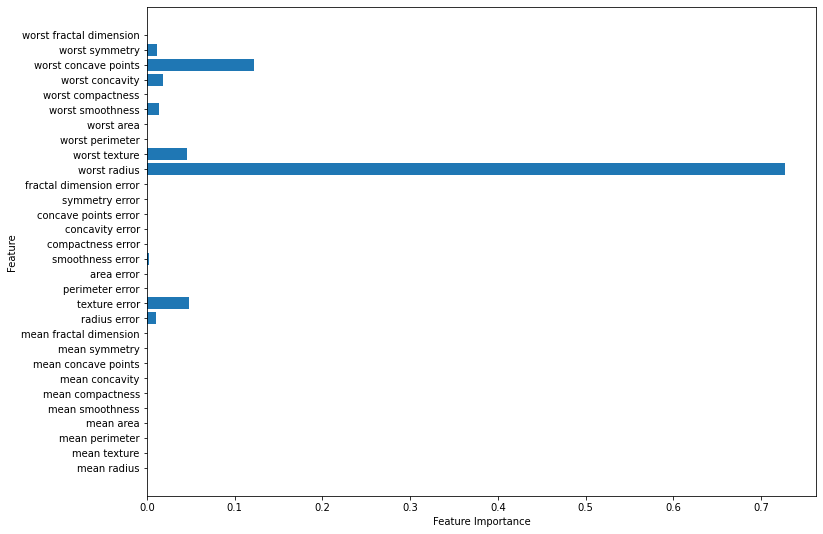

In [47]:
import matplotlib.pyplot as plt

def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.figure(figsize=(12,9))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances_cancer(tree)

* 上図の例では、worst radiusが最も重要度が高くなっている
* しかし、特徴量の重要度はこの値が大きいと、どちらのクラスに属するかを教えてくれるわけではない

Feature importances: [0. 1.]


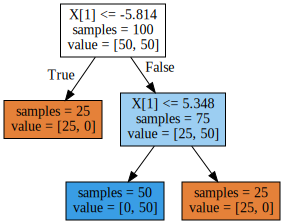

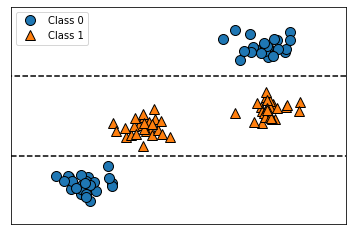

In [48]:
tree=mglearn.plots.plot_tree_not_monotone()
display(tree)

* 上図の例では、X[1]の特徴量しか見ていないが、X[1]と出力クラスの関係は単調ではない
* 「X[1]の特徴量が大きいとクラス0になり、小さいとクラス1になる（もしくはその逆）」のようなことは言えない

* すべての決定木による回帰モデルは外挿（extrapolate）ができない
* すなわち、訓練データのレンジの外側に対しては予測ができない

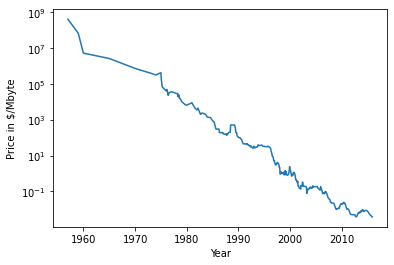

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt

ram_prices=pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')
plt.show()

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 過去のデータを用いて2000年以降の価格を予想する
data_train=ram_prices[ram_prices.date < 2000]
data_test=ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train=data_train.date[:,np.newaxis]
# データとターゲットの関係を単純にするため対数変換
y_train=np.log(data_train.price)

tree=DecisionTreeRegressor().fit(X_train,y_train)
linear_reg=LinearRegression().fit(X_train,y_train)

# すべての価格を予測
X_all=ram_prices.date[:,np.newaxis]

pred_tree=tree.predict(X_all)
pred_lr=linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree=np.exp(pred_tree)
price_lr=np.exp(pred_lr)

<ipython-input-51-4362abb054b2>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=data_train.date[:,np.newaxis]
<ipython-input-51-4362abb054b2>:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all=ram_prices.date[:,np.newaxis]


<ipython-input-71-aaedcdd6431f>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.semilogy(data_train.date,data_train.price,label='Training data',lineStyle='-')


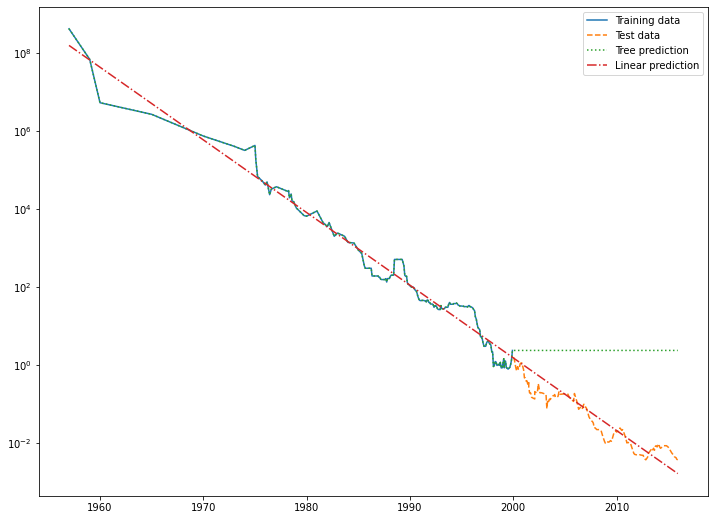

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.semilogy(data_train.date,data_train.price,label='Training data',lineStyle='-')
plt.semilogy(data_test.date,data_test.price,label='Test data',linestyle='--')
plt.semilogy(ram_prices.date,price_tree,label='Tree prediction',linestyle=':')
plt.semilogy(ram_prices.date,price_lr,label='Linear prediction',linestyle='-.')
plt.legend()
plt.show()

#### 2.3.5.5 長所、短所、パラメータ
* 多くの場合、事前枝刈り戦略を指定するmax_depth,max_leaf_nodes,min_samples_leafのどれか一つを選ぶだけで十分
* 結果のモデルが用意に可視化可能で、専門家でなくとも理解可能
* データのスケールに対して完全に不変である
* 個々の特徴量は独立に処理され、データの分割はスケールに影響しないので、決定木においては特徴量の正規化や標準化が必要ない
* 最大の問題点は事前枝刈りを行ったとしても過剰適合しやすく、汎化性能が低い傾向があるため、ほとんどの場合は単体では用いられず、アンサンブル法が用いられる

### 2.3.6 決定木のアンサンブル法
ランダムフォレスト
* 少しずつ違う決定木をたくさん集めたもの
* 個々の決定木は比較的うまく予測できているが、一部のデータに対して過剰適合してしまっているという考え方に基づいている
* それぞれ異なった方向に過剰適合した決定木をたくさん作って、その結果の平均を取ることで過剰適合の度合いをへらすことができる
* 個々の決定木が互いに異なるように、決定木の構築過程で乱数を導入している

#### ランダムフォレストの構築
* 決定木を作るには、まずデータからブートストラップサンプリング（bootstrap sample）と呼ばれる手法を行う
* これは、n_samples個のデータポイントから、交換ありでデータポイントをランダムにn_samples回選び出す手法（復元抽出）
* こうして作られたデータセットを用いて決定木を作るが、決定木をつくるアルゴリズムを少し変更する
* 個々のノードで最適なテストを選ぶのではなく、特徴量のサブセットをランダムに選び、その特徴量を使うものの中から最適なテストを選ぶ
* 特徴量のサブセットの選択を個々のノードで独立に繰り返し行うことで、決定木の個々のノードが異なる特徴量のサブセットを使って決定を行うようになる
* max_featuresをn_fearturesに設定すると、それぞれの分岐でデータセットの中のすべての特徴量を見ることになり、特徴量選択時の乱数性はなくなる
* max_featuresを1に設定すると、分岐時に使う特徴量選択にはまったく選択肢がないことになり、ランダムに選ばれたある特徴量に対してスレッショルド（しきい値）を探すだけになる
* max_featuresを大きくすると、ランダムフォレスト中の決定木が似たようなものになり、最も識別性の高い特徴量を使うので、訓練データに容易に適合する
* max_featuresを小さくすると、ランダムフォレスト中の決定木は相互に大幅に異なるものになるため、それぞれの決定木をかなり深く作らないとデータに適合できない
* ランダムフォレストで予測を行う場合は、まずすべての決定木に対して予測を行う
* 回帰の場合はこれらの結果の平均値を最終的な予測として用いる
* クラス分類の場合は、「ソフト投票」戦略が用いられる
* ソフト投票はそれぞれの決定木が「ソフト」な予想を行い、個々の出力ラベルに対して確率を出力、全ての決定木による確率予測を平均し、最も確率が高いラベルが予測値となる

#### ランダムフォレストの解析

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
forest=RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

* ランダムフォレストの一部として構築された決定木はestimator_属性に格納されている

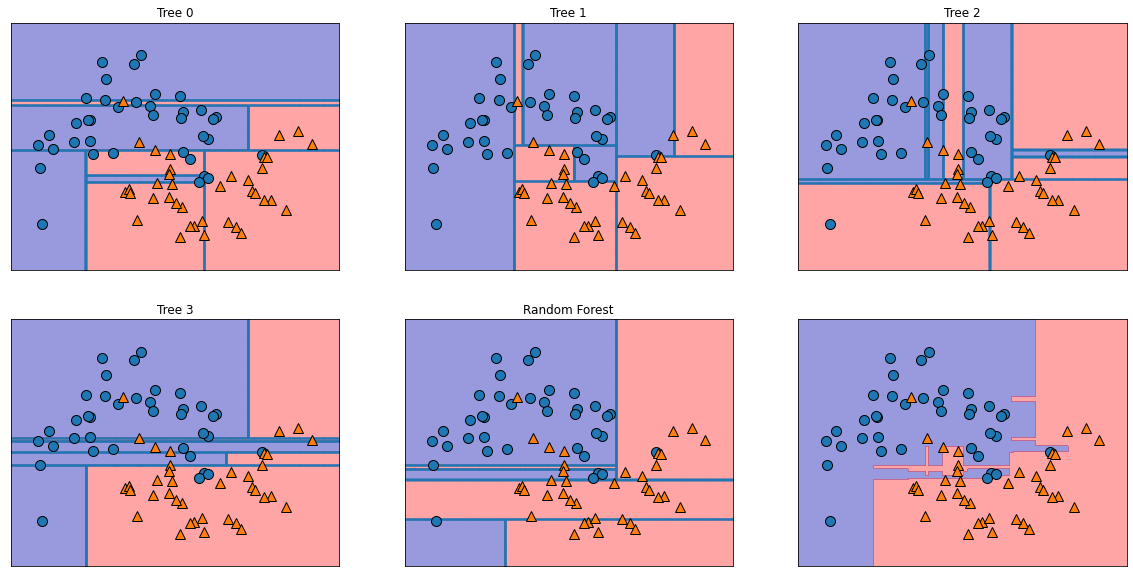

In [76]:
import matplotlib.pyplot as plt
import mglearn

fig,axes=plt.subplots(2,3,figsize=(20,10),facecolor='w')
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.show()

In [80]:
# cancerデータセットに対して100個の決定木を用いたランダムフォレスト
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from icecream import ic

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

ic(forest.score(X_train,y_train))
ic(forest.score(X_test,y_test))

ic| forest.score(X_train,y_train): 1.0
ic| forest.score(X_test,y_test): 0.972027972027972


0.972027972027972

* ランダムフォレストはデフォルトのパラメータでも十分によく機能する

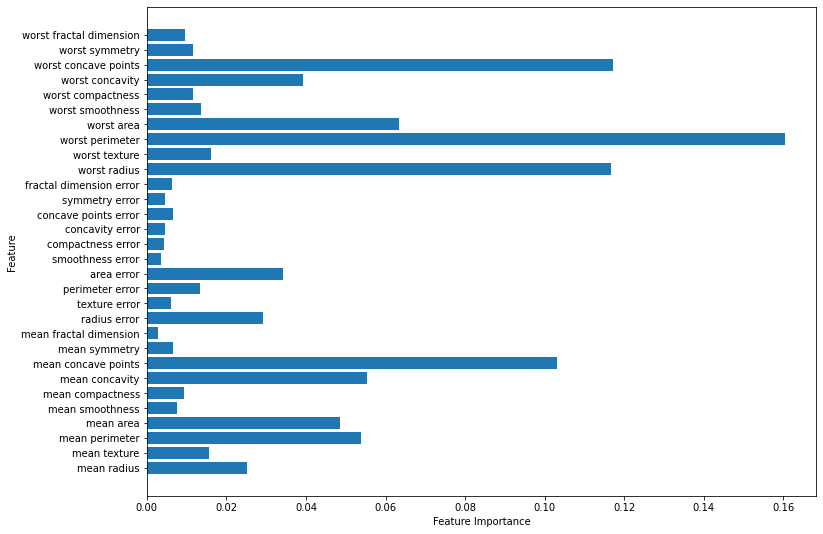

In [81]:
# 特徴量の重要度を可視化
plot_feature_importances_cancer(forest)

* ランダムフォレストの結果は、個々の決定木の結果よりも広い視野で見た全体像を捉えることができる

#### 長所、短所、パラメータ
* 回帰でもクラス分類でも、ランダムフォレストが最も広く使われている機械学習手法
* 多くの場合、パラメータチューニングをせずに使え、データのスケール変換も必要ない
* 決定木の多くの利点を残したまま、決定木の欠点の一部を補っている
* 予測の過程を専門家でない人にもわかるようにしたい場合は決定木を用いると良い
* 大きいデータセットに対してランダムフォレストを作成するためには時間がかかるが、計算機上のCPUコア（n_jobsパラメータでコア数を指定）を複数使って並列化できる
* n_jobs=-1とすると計算機上のすべてのコアを使用する
* 基本的にランダム探索のため、random_stateを固定しないと構築されるモデルが大きく変わることに注意
* ランダムフォレストはテキストデータなどの非常に高次元で疎なデータに対してはうまく機能しない傾向にある
* 線形モデルよりも多くのメモリを消費し、訓練も予測も遅いため、実行時間やメモリが重要なアプリでは線形モデルを使ったほうが良い
* n_estimatorsは大きければ大きいほど、より多くの決定木の平均をとり、過剰適合が低減されアンサンブルが頑健になるるため、よい（時間とメモリのある限り大きくする）
* max_featuresは個々の決定木の乱数性を決定するとともに、max_featuresが小さくなると過剰適合が低減する（一般にはデフォルト値を使うと良い）
* クラス分類については、max_features=sqrt(n_features)、回帰についてはmax_features=n_featuresとなっている
* max_featuresやmax_leaf_nodesを追加すると性能が上がったり、訓練や予測にかかる時間が大幅に縮まることがある

#### 2.3.6.2 勾配ブースティング回帰木（勾配ブースティングマシン）
* 複数の決定木を組み合わせてより強力なモデルを構築するもう一つのアンサンブル手法
* 回帰にもクラス分類にも使える
* 一つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく
* デフォルトでは乱数性はないかわりに、強力な事前枝刈りが行われる
* 深さ1から5ぐらいの非常に浅い決定木が用いられることで、モデルの占めるメモリが小さくなり、予測も速くなる
* 勾配ブースティングのポイントは、浅い決定木のような、簡単なモデル（弱学習器（weak learner））を多数組み合わせること
* 勾配ブースティング回帰木は機械学習のコンペティションでしばしば優勝しているし、産業界でも広く使われている
* パラメータさえ正しく設定されていれば、ランダムフォレストよりも性能が良い
* learning_rate（学習率）：個々の決定木がそれまでの決定木の過ちをどれくらい強く補正しようとするかを制御するパラメータ
* 学習率を大きくすると、個々の決定木が強く補正を行おうとし、モデルは複雑になる
* n_estimators_を増やすことでアンサンブル中の決定木の数を増やすと、訓練セットに焼いする過ちを補正する機会が増えるので、モデルは複雑になる

In [88]:
# 勾配ブースティング回帰木をcancerデータセットに適用する
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from icecream import ic

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

ic(gbrt.score(X_train,y_train))
ic(gbrt.score(X_test,y_test))

ic| gbrt.score(X_train,y_train): 1.0
ic| gbrt.score(X_test,y_test): 0.965034965034965


0.965034965034965

* 訓練データに対する精度が100％になっているので、おそらく過剰適合している
* 過剰適合を低減するには、深さの最大値を制限してより強力な事前枝刈りを行うか、学習率を下げれば良い

In [84]:
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

ic(gbrt.score(X_train,y_train))
ic(gbrt.score(X_test,y_test))

ic| gbrt.score(X_train,y_train): 0.9906103286384976
ic| gbrt.score(X_test,y_test): 0.972027972027972


0.972027972027972

In [85]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

ic(gbrt.score(X_train,y_train))
ic(gbrt.score(X_test,y_test))

ic| gbrt.score(X_train,y_train): 0.9882629107981221
ic| gbrt.score(X_test,y_test): 0.965034965034965


0.965034965034965

* 決定木の最大深さを制限したほうがモデル性能は大きく向上している

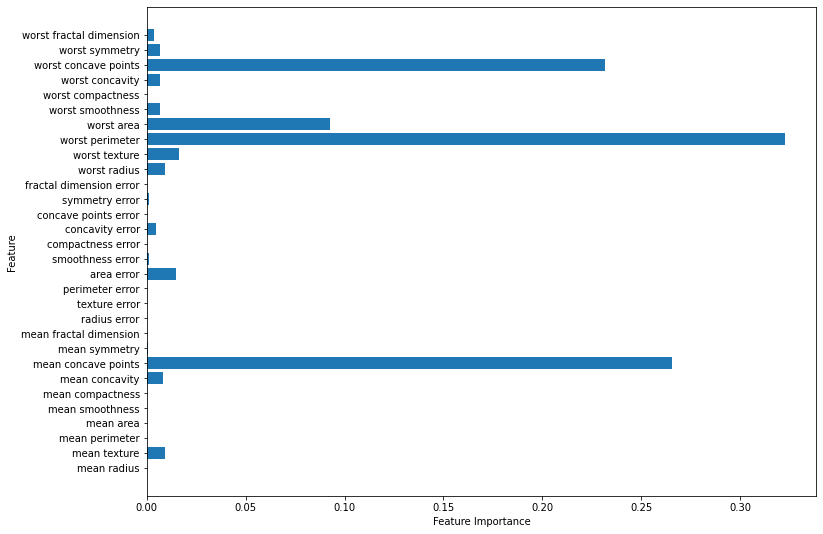

In [89]:
# 特徴量の重要度の可視化
gbrt=GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

* 勾配ブースティング回帰木では、いくつかの特徴量が完全に無視される
* 勾配ブースティングとランダムフォレストは同じようなデータを得意とするので、一般には頑健なランダムフォレストを先に試したほうが良い
* 予測時間が非常に重要な場合や、機械学習モデルから最後の1％まで性能を絞り出したい場合は勾配ブースティングを使うと良い
* 勾配ブースティングを大きい問題に適用したい場合は、xgboostパッケージと、そのPythonインターフェースを見てみると良い（sklearnよりも高速で多くの場合チューニングも容易）

#### 長所、短所、パラメータ
* 勾配ブースティング回帰木は教師あり学習の中でも最も強力で、広く使われているモデル
* パラメータのチューニングに細心の注意が必要
* 訓練にかかる時間が長い
* 特徴量のスケール変換の必要はなく、2値特徴量と連続値特徴量が混在してもうまく機能する
* 高次元の疎なデータにはうまく機能しない
* パラメータとして、決定木の数を指定するn_estimatorsと、個々の決定木がそれまでの決定木の誤りを補正する度合いを制御するlearning_rateがある
* learning_rateを小さくすると、同じ複雑さのモデルを作るにはよりたくさんの決定木が必要になるため、これらのパラメータは強く相関している
* ランダムフォレストの場合はn_estimatorsの値は大きければ大きいほど良かったが、勾配ブースティングの場合はn_estimatorsを大きくすると、複雑なモデルを許容することになり、過剰適合を招く
* n_estimatorsを時間とメモリ量で決めておいて、learning_rateに対して探索を行うのが良い
* 一般に勾配ブースティングではmax_depthは非常に小さく設定され、深さが5以上になることはあまりない

### 2.3.7 カーネル法を用いたサポートベクターマシン
* 入力空間の超平面のような簡単なモデルではなく、より複雑なモデルを可能にするために線形サポートベクターマシンを拡張したもの

#### 2.3.7.1 線形モデルと非線形特徴量

Text(0, 0.5, 'Feaature 1')

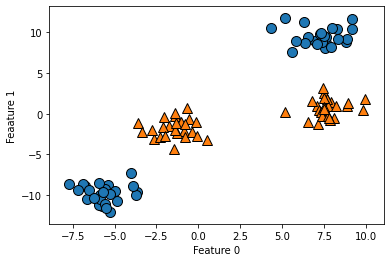

In [1]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

X,y=make_blobs(centers=4,random_state=8)
y=y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feaature 1')

* 線形モデルによるクラス分類では、直線でしか分類できないのでこのようなデータセットではうまくいかない

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'Feaature 1')

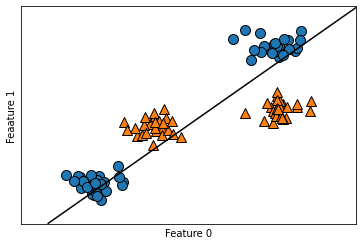

In [8]:
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

linear_svm=LinearSVC().fit(X,y)

plt.figure(facecolor='w')
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feaature 1')

* 入力特徴量に2番目の特徴量の2乗を新しい特徴量として追加してみる

Text(0.5, 0, 'feature1**2')

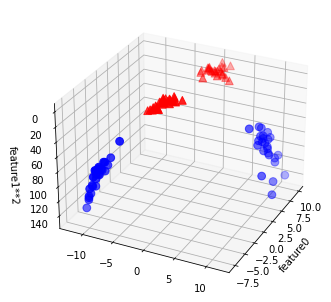

In [12]:
# 2番目の特徴量の2乗を追加
import numpy as np

X_new=np.hstack([X,X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D,axes3d
figure=plt.figure()

# 3Dで可視化
ax=Axes3D(figure,elev=-152,azim=-26)

# y==0の点をプロットしてからy==1の点をプロット
mask=y==0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature0')
ax.set_label('feature1')
ax.set_zlabel('feature1**2')


* この新しい表現では、2つのクラスを線形モデルで、つまり3次元空間内の平面を用いて分離する事が可能になっている

/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'feature1**2')

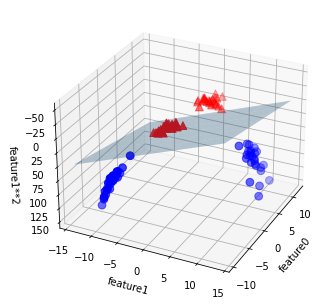

In [16]:
linear_svm_3d=LinearSVC().fit(X_new,y)
coef,intercept=linear_svm_3d.coef_.ravel(),linear_svm_3d.intercept_

# 線形決定境界を描画
figure=plt.figure()
ax=Axes3D(figure,elev=-152,azim=-26)
xx=np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy=np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)

XX,YY=np.meshgrid(xx,yy)
ZZ=(coef[0]*XX+coef[1]*YY+intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1**2')

* もとの特徴量の関数として見ると、線形SVMモデルは線形ではなくなり、楕円になっている

Text(0, 0.5, 'Feature 1')

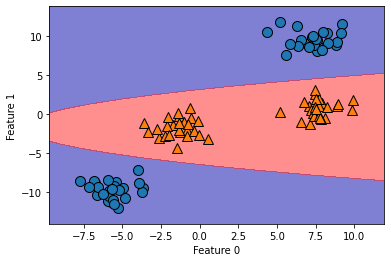

In [15]:
ZZ=YY**2
dec=linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 2.3.7.2 カーネルトリック
* 非線形の特徴量をデータ表現に加えることで、線形モデルが遥かに強力になる
* カーネルトリック（kernel trick）は、拡張された特徴表現上でのデータポイント感の距離を、実際にデータポイントの拡張をせずに、直接計算する方法

#### 2.3.7.3 SVMを理解する
* SVMは訓練の過程で、個々のデータポイントが、二つのクラスの決定境界を表現するのにどの程度重要かを学習する
* 多くの場合、二つのクラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定し、これをサポートベクタ（support vector）と呼ぶ
* クラス分類は、このサポートベクタとの距離と、訓練過程で学習された個々のサポートベクタの重要性によって決定される
* データポイント間の距離は次のように定義されるガウシアンカーネルで図られる
$$
k_{rbf}(x_1,x_2)=\exp{(-\gamma||x_1-x_2||^2)}
$$
* ここで、$x_1$と$x_2$はデータポイント、$||x_1-x_2||$はユークリッド距離、$\gamma$（ガンマ）はガウシアンカーネルの幅を制御するパラメータ

Text(0, 0.5, 'Feature 1')

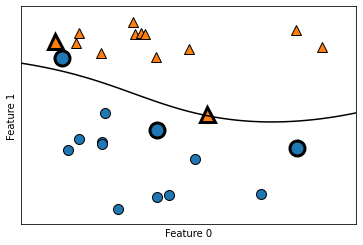

In [19]:
from sklearn.svm import SVC
X,y=mglearn.tools.make_handcrafted_dataset()
svm=SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
plt.figure(facecolor='w')
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

* SVMによる境界はなめらかで、非線形

#### 2.3.7.4 SVMパラメータの調整
* gammaパラメータはガウシアンカーネルの幅を調整し、このパラメータが点が近いということを意味するスケールを決定する
* Cパラメータは線形モデルで用いられたのと同様の正則化パラメータであり、個々のデータポイントの重要度を制限する

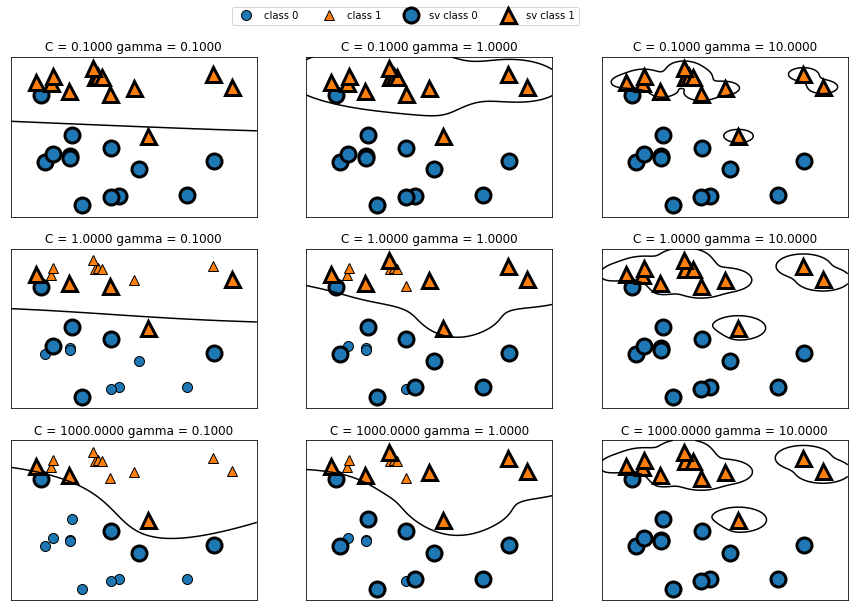

In [24]:
fig,axes=plt.subplots(3,3,figsize=(15,10),facecolor='w')

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

axes[0,0].legend(['class 0','class 1','sv class 0','sv class 1'],ncol=4,loc=(.9,1.2))

* gammaが小さいとガウシアンカーネルの直径が大きくなり、多くの点を近いと判断するようになる
* gammaが小さいと決定境界はゆっくりとしか変化せず、モデルの複雑さは小さくなる
* 線形モデルの場合と同様に、小さいCは制限されたモデルに対応し、個々のデータポイントに与える影響は限定される
* Cを大きくすると、データポイントが強い影響をもつようになり、正しくクラス分類されるように決定境界を曲げている

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from icecream import ic

cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svc=SVC()
svc.fit(X_train,y_train)

ic(svc.score(X_train,y_train))
ic(svc.score(X_test,y_test))

ic| svc.score(X_train,y_train): 0.903755868544601
ic| svc.score(X_test,y_test): 0.9370629370629371


0.9370629370629371

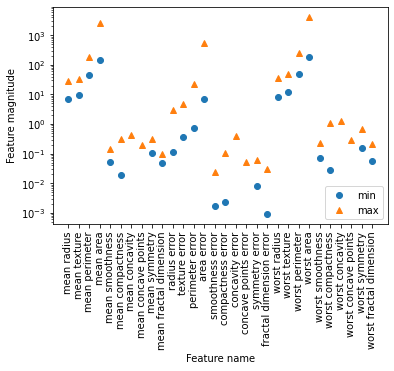

In [38]:
plt.plot(cancer.feature_names,X_train.min(axis=0),'o',label='min')
plt.plot(cancer.feature_names,X_train.max(axis=0),'^',label='max')
plt.legend(loc=4)
plt.xlabel('Feature name')
plt.ylabel('Feature magnitude')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

* cancerデータセットの特徴量は相互に桁違いにサイズが違う
* これは、カーネル法を用いたSVMでは破壊的な影響をもたらす

#### 2.3.7.5 SVMのためのデータの前処理
* すべての特徴量が0から1の範囲になるようにスケールを変換する

In [39]:
# 訓練セットの特徴量ごとに最小値を計算
min_on_training=X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジを計算
range_on_training=(X_train-min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0,max=1となる
X_train_scaled=(X_train-min_on_training)/range_on_training
ic(X_train_scaled.min(axis=0))
ic(X_train_scaled.max(axis=0))

ic| X_train_scaled.min(axis=0): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                                       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
ic| X_train_scaled.max(axis=0): array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                                       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
#テストセットに対しても、まったくおなじ変換を行う
# 訓練セットの最小値とレンジを用いる
X_test_scaled=(X_test-min_on_training)/range_on_training
ic(X_test_scaled.min(axis=0))
ic(X_test_scaled.max(axis=0))

ic| X_test_scaled.min(axis=0): array([ 0.03540158,  0.04190871,  0.02895446,  0.01497349,  0.14260888,
                                       0.04999658,  0.        ,  0.        ,  0.07222222,  0.00589722,
                                       0.00105015, -0.00057494,  0.00067851, -0.0007963 ,  0.05148726,
                                       0.01434497,  0.        ,  0.        ,  0.04195752,  0.01113138,
                                       0.03678406,  0.01252665,  0.03366702,  0.01400904,  0.08531995,
                                       0.01833687,  0.        ,  0.        ,  0.00749064,  0.02367834])
ic| X_test_scaled.max(axis=0): array([0.76809125, 1.22697095, 0.75813696, 0.64750795, 1.20310633,
                                      1.11643038, 0.99906279, 0.90606362, 0.93232323, 0.94903117,
                                      0.45573058, 0.72623944, 0.48593507, 0.31641282, 1.36082713,
                                      1.2784499 , 0.36313131, 0.77476795, 1.32643996, 0

array([0.76809125, 1.22697095, 0.75813696, 0.64750795, 1.20310633,
       1.11643038, 0.99906279, 0.90606362, 0.93232323, 0.94903117,
       0.45573058, 0.72623944, 0.48593507, 0.31641282, 1.36082713,
       1.2784499 , 0.36313131, 0.77476795, 1.32643996, 0.72672498,
       0.82106012, 0.87553305, 0.77887345, 0.67803775, 0.78603975,
       0.87843331, 0.93450479, 1.0024113 , 0.76384782, 0.58743277])

In [48]:
svc=SVC(C=10)
svc.fit(X_train_scaled,y_train)

ic(svc.score(X_train_scaled,y_train))
ic(svc.score(X_test_scaled,y_test))

ic| svc.score(X_train_scaled,y_train): 0.9882629107981221
ic| svc.score(X_test_scaled,y_test): 0.972027972027972


0.972027972027972

#### 2.3.7.6 利点、欠点、パラメータ
* SVMを用いると、データに僅かな特徴量しかない場合にも複雑な決定境界を生成することができる
* 低次元のデータ（特徴量の少ないデータ）でも高次元のデータでもうまく機能するが、サンプルの個数が大きくなるとうまく機能しない
* 100000サンプルくらいになると、実行時やメモリ使用量の面で難しくなってくる
* 注意深くデータの前処理とパラメータの調整を行う必要がある
* SVMはモデルの検証が難しく、専門家以外への説明が大変
* 特徴量が似た測定器の測定結果（カメラのピクセルなど）のように、同じスケールになる場合はSVMを試す価値がある
* RBFカーネルのパラメータは、ガウシアンカーネルの幅の逆数を表すgammaだけ
* gammaとCは両方ともモデルの複雑さを盛業するパラメータで、大きくするとより複雑なモデルになる
* Cとgammaは強く相関するため、同時に調整する必要がある

### 2.3.8 ニューラルネットワーク

#### 2.3.8.1 ニューラルネットワークモデル

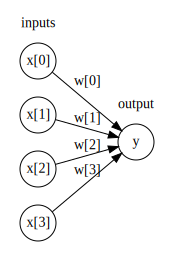

In [2]:
import mglearn
display(mglearn.plots.plot_logistic_regression_graph())

* 上図は線形回帰を図示したもの
* 入力特徴量と予測がノードとして与えられており、係数がノードを結んでいる
* 左側のノード郡は入力特徴量を表し、接続している線が学習された係数を、右側のノードが出力を表す
* 出力は入力に対する重み付き和になっている
* 多層パーセプトロン（MLP: multilayer perceptron）では、この重み付き和の計算が繰り返し行われる
* まず中間処理ステップを表す隠れユニット（hidden units）の計算で重み付き和が行われ、次にこの隠れユニットの値に対して重み付き和が行われて最後の結果が算出される

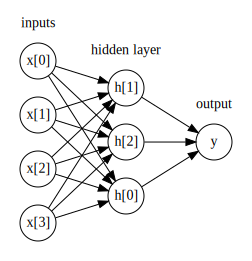

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

* このモデルで学習しなければならない係数（重み）は、すべてのノードとすべての隠れユニットとの間に一つずつと、すべての隠れユニットと出力ノードとの間に一つずつある
* 一連の重み付き和を計算することは、数学的には一つの重み付き和を計算することは同義であるので、このモデルを線形モデルよりも強力にするために、個々の隠れユニットの重み付き和を計算したら、その結果に対して非線形関数を適用する
* 多くの場合、relu（rectified linear unit：正規化線形関数）かtanh（hyperbolic tangent：双曲正接関数）が用いられる
* reluはゼロ以下の値を切り捨てる
* tanhは小さい値に対しては-1に、大きい値に対しては1に飽和する

Text(0, 0.5, 'relu(x),tanh(x)')

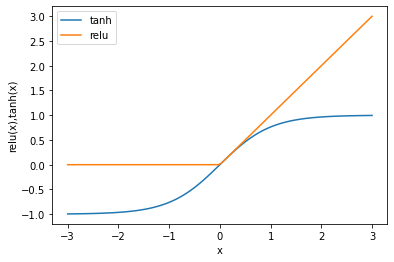

In [7]:
import numpy as np
import matplotlib.pyplot as plt

line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x),tanh(x)')

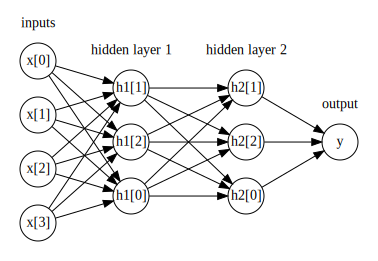

In [8]:
mglearn.plots.plot_two_hidden_layer_graph()

* 隠れ層を追加することもできる
* このような計算層をたくさん持つ大きなニューラルネットワークから、ディープラーニングという言葉が生まれた

#### 2.3.8.2 ニューラルネットワークのチューニング

Text(0, 0.5, 'Feature 1')

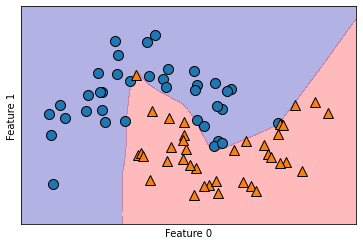

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

mlp=MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
plt.figure(facecolor='w')
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

* ニューラルネットワークは全く線形ではないが、比較的なめらかな決定境界を学習している
* デフォルトでは、MLPは100隠れユニットを用いる

Text(0, 0.5, 'Feature 1')

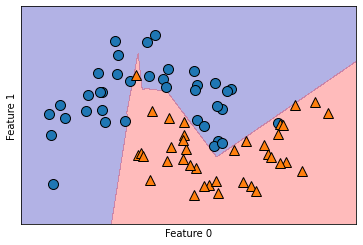

In [18]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10],max_iter=1000).fit(X_train,y_train)
plt.figure(facecolor='w')
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

* 隠れユニットを10に設定すると、決定境界は少しギザギザになる
* デフォルトでは、非線形化にreluが用いられる
* 隠れ層が10の場合には、reluを使うと、決定曲線は10の線分から構成されることになる
* 決定境界をもっとなめらかにしたい場合は、隠れ層のユニット数を増やす、隠れ層を増やす、非線形活性関数にtanhを用いれば良い

Text(0, 0.5, 'Feature 1')

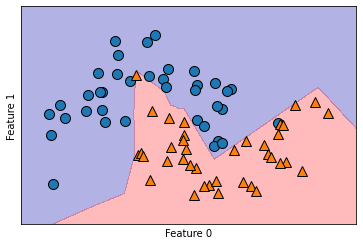

In [19]:
# それぞれ10ユニットの隠れ層を2層使う
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10],max_iter=1000).fit(X_train,y_train)
plt.figure(facecolor='w')
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

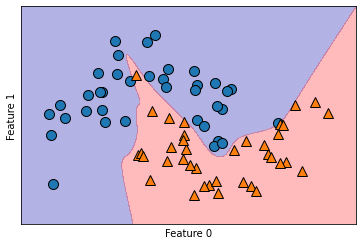

In [20]:
# それぞれ10ユニットの隠れ層を2層使う。さらに非線形活性化関数にtanhを使う
mlp=MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10],max_iter=1000).fit(X_train,y_train)
plt.figure(facecolor='w')
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

* ニューラルネットワークの複雑さを、リッジ回帰や線形クラス分類器で行ったのと同様にl2ペナルティで重み0に近づけることで制御することができる
* MLPClassifierでは、このパラメータは（線形回帰モデルと同じ）alphaで、デフォルトでは非常に小さい値（弱い正則化）に設定されている

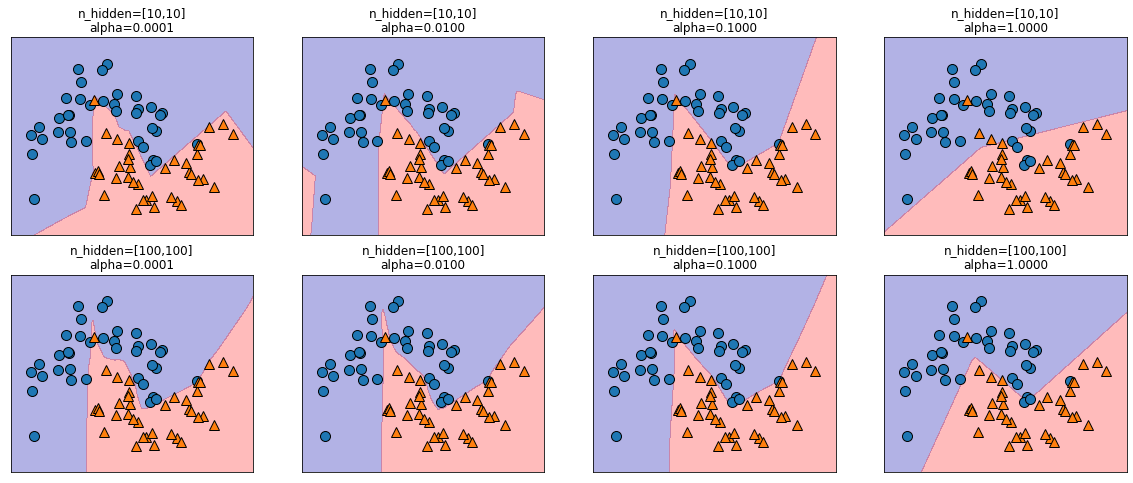

In [23]:
fig,axes=plt.subplots(2,4,figsize=(20,8),facecolor='w')
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha,max_iter=1000)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title('n_hidden=[{},{}]\nalpha={:.4f}'.format(n_hidden_nodes,n_hidden_nodes,alpha))

* ニューラルネットワークは学習を開始する前に重みを乱数で割り当てる
* この乱数による初期化の影響が、学習されるモデルに影響を与えることは、ニューラルネットワークの重要な性質の一つ
* これは、まったく同じパラメータを用いても、異なる乱数シードを用いると、まったく異なったモデルが得られることを意味する

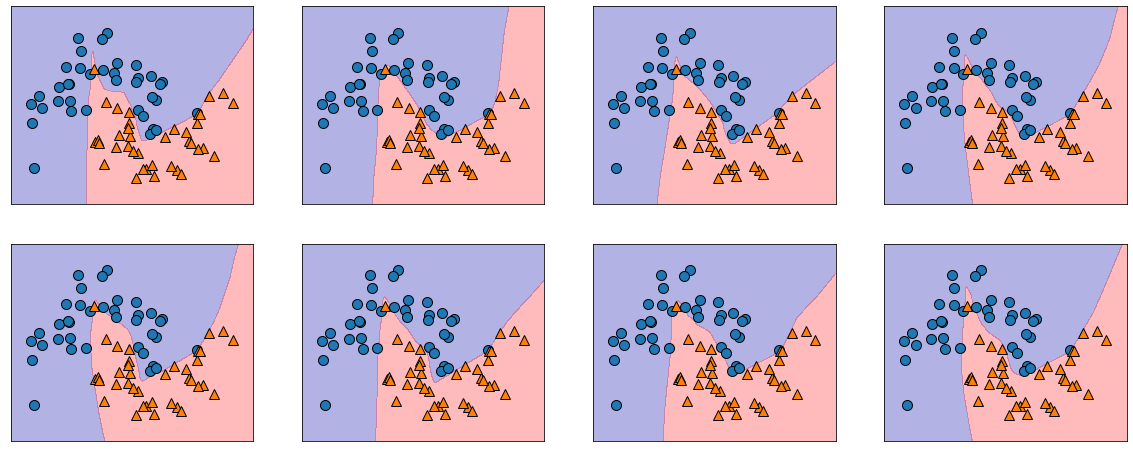

In [27]:
fig,axes=plt.subplots(2,4,figsize=(20,8),facecolor='w')
for i,ax in enumerate(axes.ravel()):
    mlp=MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [30]:
# cancerデータセットの各特徴量の最大値
from icecream import ic
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
ic(cancer.data.max(axis=0))

ic| cancer.data.max(axis=0): array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
                                    4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
                                    2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
                                    7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
                                    2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])


array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [32]:
# データの前処理をせずに学習してみる
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

ic(mlp.score(X_train,y_train))
ic(mlp.score(X_test,y_test))

ic| mlp.score(X_train,y_train): 0.9389671361502347
ic| mlp.score(X_test,y_test): 0.916083916083916


0.916083916083916

* 精度はかなり良いが、他のモデルほどではないのは、データスケールの問題
* 理想的には平均が0、分散が1であることが望ましい

In [37]:
# 訓練セットの特徴量ごとの平均値を算出
mean_on_train=X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train=X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換することでmean=0、std=1になる
X_train_scaled=(X_train-mean_on_train)/std_on_train
# まったく同じ変換（訓練データの平均と標準偏差を使って）をテストデータに施す
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

ic(mlp.score(X_train_scaled,y_train))
ic(mlp.score(X_test_scaled,y_test))

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
ic| mlp.score(X_train_scaled,y_train): 0.9906103286384976
ic| mlp.score(X_test_scaled,y_test): 0.965034965034965


0.965034965034965

* 学習繰り返しの回数が最大値に達したと警告が出ている
* これはモデル学習に使っているadamアルゴリズムの機能で、学習繰り返しの回数を増やすべきと言っている

In [38]:
mlp=MLPClassifier(random_state=0,max_iter=1000)
mlp.fit(X_train_scaled,y_train)

ic(mlp.score(X_train_scaled,y_train))
ic(mlp.score(X_test_scaled,y_test))

ic| mlp.score(X_train_scaled,y_train): 1.0
ic| mlp.score(X_test_scaled,y_test): 0.972027972027972


0.972027972027972

In [39]:
mlp=MLPClassifier(random_state=0,max_iter=1000,alpha=1)
mlp.fit(X_train_scaled,y_train)

ic(mlp.score(X_train_scaled,y_train))
ic(mlp.score(X_test_scaled,y_test))

ic| mlp.score(X_train_scaled,y_train): 0.9882629107981221
ic| mlp.score(X_test_scaled,y_test): 0.972027972027972


0.972027972027972

* ニューラルネットワークが学習した内容を解析することは可能であるが、線形モデルや決定木を用いたモデルの解析よりも難しい
* なにが学習されたのかを見る方法の一つは、モデル内部の重みを見てみること

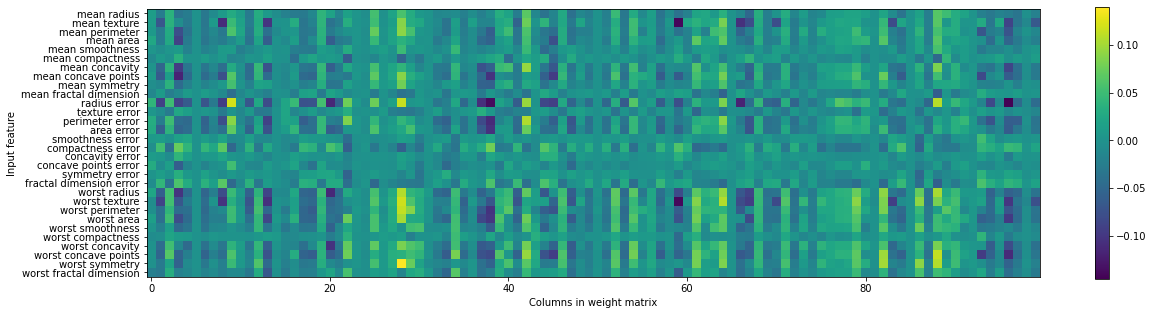

In [40]:
plt.figure(figsize=(20,5),facecolor='w')
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

* 明るい色が大きな正の値、暗い色が負の値
* すべての隠れユニットに対して重みが小さい特徴量は、このモデルにとって「重要ではない」と言える
* MLPClassifierとMLPRegressorは、一般的なニューラルネットワークアーキテクチャを簡単に利用できるが、より柔軟で大きなモデルを使いたい場合は、keras、lasagna、tensor-flowなどのディープラーニングライブラリを使うと良い
* lasagnaはtheanoを用いて構築されているが、kerasはtheanoとtensor-flowのどちらも利用できる
* これらのライブラリはGPUをサポートしているが、scikit-learnはサポートしていない

#### 2.3.8.3 長所、短所、パラメータ
* 大量のデータに含まれているデータを費やし、信じられないほど複雑なモデルを構築できる
* 十分な計算時間とデータをかけ、慎重にパラメータを調整すれば、他の機械学習アルゴリズムに勝てることが多い
* 大きくて強力なものは訓練に時間がかかる
* データを慎重に前処理する必要がある
* SVMと同じように、データが「同室」な場合、つまりすべての特徴量が同じ意味をもつ場合に最もよく機能する
* さまざまな種類の特徴量を持つデータに関しては、決定木のほうが性能が良いことが多い
* パラメータの調整自体がひとつの技芸となっている

#### ニューラルネットワークの複雑さ推定
* もっとも重要なパラメータは隠れ層の数と層あたりの隠れユニットの数
* 隠れ層あたりのノードの数は入力層と同じくらいにすることが多いが、数千より大きくなることはあまりない
* ニューラルネットワークのモデルの複雑さを考える上で学習すべき重み、もしくは係数の数が一つの尺度となる
* ニューラルネットワークのパラメータを調整する一般的なやり方は、まず過剰適合できるように大きいネットワークを作ってから、ネットワークを小さくするか、alphaを増やして正則化を強化して汎化性能を向上させる
* どのようにモデルを学習するか、つまりパラメータを学習する際に用いるアルゴリズムも考えなければならない
* デフォルトの'adam'はほとんどのケースでよく機能するが、データスケールにはとても敏感
* 'lbfgs'は頑健だが、モデルが大きい場合や、大規模なデータセットに対しては、訓練に時間がかかる
* 'sgd'は更に多くの設定パラメータがあるため、調整が大変
* MLP初心者は'adam'と'lbfgs'を使っておけば良い

### 2.4 クラス分類器の不確実性推定
* scikit-learnのクラス分類機の殆どは、不確実性推定に関する関数として、dicision-functionとpredict_probaのどちらかが実装されている

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X,y=make_circles(noise=0.25,factor=0.5,random_state=1)

y_named=np.array(['blue','red'])[y]
# train_test_splitは任意の数の配列に適用できる
X_train,X_test,y_train_named,y_test_named,y_train,y_test=train_test_split(X,y_named,y,random_state=0)

gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 決定関数（Decision Function）
* 2クラス分類の場合、decision_functionの結果の配列は（n_samples,）の形になり、サンプルごとに一つの浮動小数点が返される
* この値には、あるデータポイントが「陽性」であると、モデルが信じている度合いがエンコードされている
* 正であれば陽性クラス、負であれば陰性クラスを意味する

In [42]:
ic(X_test.shape)
ic(gbrt.decision_function(X_test).shape)

ic| X_test.shape: (25, 2)
ic| gbrt.decision_function(X_test).shape: (25,)


(25,)

In [43]:
ic(gbrt.decision_function(X_test)[:6])

ic| gbrt.decision_function(X_test)[:6]: array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
                                                3.66166081])


array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081])

* 決定関数の符号だけ見れば、予測クラスがわかる

In [44]:
ic(gbrt.decision_function(X_test)>0)
ic(gbrt.predict(X_test))

ic| gbrt.decision_function(X_test)>0: array([ True, False, False, False,  True,  True, False,  True,  True,
                                              True, False,  True,  True, False,  True, False, False, False,
                                              True,  True,  True,  True,  True, False, False])
ic| gbrt.predict(X_test): array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
                                 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
                                 'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')


array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

* 2クラス分類では、陰性クラスがclasses_属性の第1エントリに、陽性クラスが第2エントリになる
* 完全にpredictと同じ結果を再現したければ、classes_属性を使えば良い

In [45]:
# True/Falseを0/1に
greater_zero=(gbrt.decision_function(X_test)>0).astype(int)
# 0/1をclasses_のインデックスに使う
pred=gbrt.classes_[greater_zero]
# predはgbrt.predictの出力とおなじになる
ic(np.all(pred==gbrt.predict(X_test)))

ic| np.all(pred==gbrt.predict(X_test)): True


True

* decision_functionのレンジは決まっておらず、データとモデルパラメータに依存する

In [46]:
# 決定関数の最小値　最大値
decision_function=gbrt.decision_function(X_test)
ic(np.min(decision_function))
ic(np.max(decision_function))

ic| np.min(decision_function): -7.690971785101899
ic| np.max(decision_function): 4.289866423997604


4.289866423997604

* このように、decision_functionの結果はどのようなスケールで表示されるかわからないので、解釈が難しい

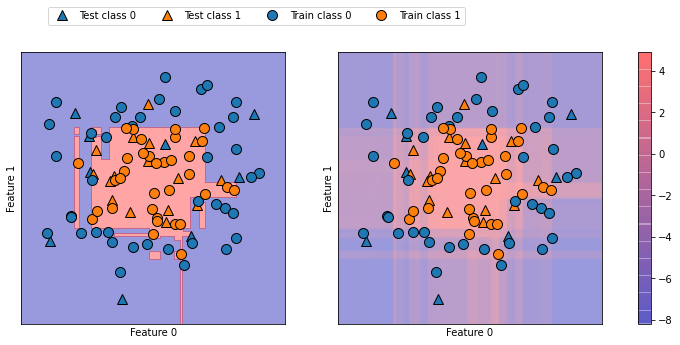

In [47]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt,X,ax=axes[0],alpha=.4,fill=True,cm=mglearn.cm2)
scores_image=mglearn.tools.plot_2d_scores(gbrt,X,ax=axes[1],alpha=.4,cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1],y_test,markers='^',ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,markers='o',ax=ax)
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
cbar=plt.colorbar(scores_image,ax=axes.tolist())
axes[0].legend(['Test class 0','Test class 1','Train class 0','Train class 1'],ncol=4,loc=(.1,1.1))

* この図では境界がはっきりしており、わずかに存在する確信度が低い領域もはっきりわかる

### 2.4.3 多クラス分類の不確実性

In [50]:
from sklearn.datasets import load_iris

iris=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=42)

gbrt=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
gbrt.fit(X_train,y_train)

ic(gbrt.decision_function(X_test).shape)
# 決定境界の最初のいくつかを表示
ic(gbrt.decision_function(X_test)[:6,:])

ic| gbrt.decision_function(X_test).shape: (38, 3)
ic| gbrt.decision_function(X_test)[:6,:]: array([[-1.995715  ,  0.04758267, -1.92720695],
                                                 [ 0.06146394, -1.90755736, -1.92793758],
                                                 [-1.99058203, -1.87637861,  0.09686725],
                                                 [-1.995715  ,  0.04758267, -1.92720695],
                                                 [-1.99730159, -0.13469108, -1.20341483],
                                                 [ 0.06146394, -1.90755736, -1.92793758]])


array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758]])

* 多クラス分類の場合はdecision_functionの結果は（n_samples,n_classes）の形の配列になる
* 各列は個々のクラスに対する確信度スコアで、大きいとそのクラスである可能性が高く、小さいと可能性が低くなる
* 各データポイントに対して確信度スコア最大になるクラスを選ぶことで、予測クラスが得られる


In [52]:
ic(np.argmax(gbrt.decision_function(X_test),axis=1))
ic(gbrt.predict(X_test))

ic| np.argmax(gbrt.decision_function(X_test),axis=1): array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
                                                             0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])
ic| gbrt.predict(X_test): array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
                                 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

* predict_probaの出力も、同じ（n_samples,n_classes）の形の配列となる
* 各クラスになる確率の和は1となる

In [53]:
ic(gbrt.predict_proba(X_test)[:6])
ic(gbrt.predict_proba(X_test)[:6].sum(axis=1))

ic| gbrt.predict_proba(X_test)[:6]: array([[0.10217718, 0.78840034, 0.10942248],
                                           [0.78347147, 0.10936745, 0.10716108],
                                           [0.09818072, 0.11005864, 0.79176065],
                                           [0.10217718, 0.78840034, 0.10942248],
                                           [0.10360005, 0.66723901, 0.22916094],
                                           [0.78347147, 0.10936745, 0.10716108]])
ic| gbrt.predict_proba(X_test)[:6].sum(axis=1): array([1., 1., 1., 1., 1., 1.])


array([1., 1., 1., 1., 1., 1.])

In [54]:
# predict_probaのargmaxをとることで予測クラスを再現する
ic(np.argmax(gbrt.predict_proba(X_test),axis=1))
ic(gbrt.predict(X_test))

ic| np.argmax(gbrt.predict_proba(X_test),axis=1): array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
                                                         0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])
ic| gbrt.predict(X_test): array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
                                 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

* 2クラス分類の場合のdecision_functionだけが例外で、陽性クラスであるclasses_[1]に対応する一列しかない
* クラスの数だけ列がある場合には、列に対してargmaxを計算すれば、予測を再現できる
* predictで得られた結果を、decision_functionやpredict_probaで得られた結果と比較する際には、クラス分類器のclasses_属性を使って、実際のクラス名を使うようにしなければならない

In [57]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)

# irisデータセットのクラス名で表示する
named_target=iris.target_names[y_train]
logreg.fit(X_train,named_target)
ic(logreg.classes_)
ic(logreg.predict(X_test)[:10])
argmax_dec_func=np.argmax(logreg.decision_function(X_test),axis=1)
ic(argmax_dec_func[:10])
ic(logreg.classes_[argmax_dec_func][:10])

ic| logreg.classes_: array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
ic| logreg.predict(X_test)[:10]: array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
                                        'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
                                       dtype='<U10')
ic| argmax_dec_func[:10]: array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])
ic| logreg.classes_[argmax_dec_func][:10]: array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
                                                  'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
                                                 dtype='<U10')


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

## 2.5 まとめと今後の展望
最近傍法
* 小さいデータに関しては良いベースラインとなる
* 説明が容易
  
線形モデル
* 最初に試してみるべきアルゴリズム
* 非常に大きいデータセットに適する
* 非常に高次元のデータに適する
  
ナイーブベイズ
* クラス分類にしか使えない
* 線形モデルよりもさらに高速
* 非常に大きいデータセット、高次元データに適する
* 線形モデルよりも精度が劣る事が多い
  
決定木
* 非常に高速
* データのスケールを考慮する必要がない
* 可視化が可能で説明しやすい
  
ランダムフォレスト
* 殆どの場合単一の決定木よりも高速で、頑健で、強力
* データのスケールを考慮する必要がない
* 高次元の疎なデータには適さない
  
勾配ブースティング木
* 多くの場合ランダムフォレストよりも少し精度が高い
* ランダムフォレストよりも訓練に時間がかかるが、予測がこちらのほうが速く、メモリ使用量も小さい
* ランダムフォレストよりもパラメータに敏感
  
サポートベクターマシン
* 同じような意味を持つ特徴量からなる中規模なデータセットに対しては強力
* データのスケールを調整する必要がある
* パラメータに敏感
  
ニューラルネットワーク
* 非常に複雑なモデルを構築できる
* 特に大きなデータセットに有効
* データのスケールを調整する必要がある
* パラメータに敏感
* 大きいモデルは訓練に時間がかかる

* 新しいデータセットを扱う場合は、線形モデルやナイーブベイズや最近傍法などの、簡単なモデルでどのくらい精度が得られるか試すべき
* データを深く理解できたら、ランダムフォレストや勾配ブースティング、SVM、ニューラルネットワークなどのより複雑なモデルに移行すると良い